## Overview

In this section I will cover linear regression for multiple variables, using <i>Programming Exercise 1: Linear Regression (Optional Exercises)</i> from the Stanford Machine Learning course to illustrate. 

### Part 1: Dataset

The dataset consists of 47 training examples about housing prices based on their size ($ft^2$) and number of rooms. The first column contains the size of the house, the second contains the number of rooms it has, and the third column contains the price the house was sold for. Again we can load the data using numpy:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt

def load_data(input_file, delim=','):
    """Loads the data for our problem"""
    
    data = np.loadtxt(input_file, delimiter=delim)
    n_features = data.shape[1]-1 
    if n_features == 1: 
        X = data[:,0]
    else: 
        X = data[:,np.arange(n_features)]
    y = data[:,n_features]
    assert len(X) == len(y)
    print("Number of training examples: %i" % X.shape[0])
    print("Number of features: %s" % X.shape[1])

    return X, y
X,y = load_data("ex1data2.txt");

Number of training examples: 47
Number of features: 2


And again we can visualize the data using numpy, only this time using a matplotlib 3D scatter plot.

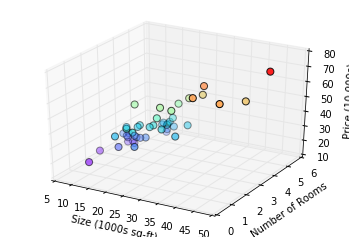

In [6]:
from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0]*0.01, X[:, 1], y*0.0001, s=50, c=y, cmap='rainbow')
ax.set_xlabel('Size (1000s sq-ft)')
ax.set_ylabel('Number of Rooms')
ax.set_zlabel('Price (10,000s)');

### Part 2: Training

The linear regression class from the previous exercise (<a href="linearregression.py">MyLinearRegressor</a>) can be easily reused for the multiple variable case. The main difference is that the hypothesis function 

$$h_{\theta}(x) = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \ldots + \theta_n  x_n,$$ 

contains multiple variables, where the parameter vector is now defined as

$$\Theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}.$$ 

The vectorized hypothesis $h_{\Theta}(X) = \Theta^T X$ remains the same as before. 

#### Feature Scaling

Notice that the house size is in the range [852,  4478], while number of rooms is in the range [1, 5]. 

In [80]:
x_0_range = np.array([min(X[:,0]), max(X[:,0])])
x_1_range = np.array([min(X[:,1]), max(X[:,1])])

print(x_0_range)
print(x_1_range)

[  852.  4478.]
[ 1.  5.]


Having features on different scales can sometime lead to problems with gradient descent convergence. Therefore, to help our algorithm to converge we will perform feature scaling. That is, we will adjust the scale of each feature so that all features are in the same range. We will perform this <b>feature scaling</b> using <b>mean normalization</b> to put the input values on a [0, 1] scale using the following equation:

$$x_j := \frac{x_j - \mu_{j}}{s_{j}},$$

where $x_j$ is the $j^{th}$ feature, $\mu_j$ is the <b>mean</b> of the $j^{th}$ feature and $s_j$ is the difference between the maximum and mimimum values of the features (i.e., $s_j = max(x_j) -min(x_j)$) or alternatively, it can be the standard deviation of the feature. Normalization can be easily implemented using numpy as follows:

In [81]:
def normalize_features(X):
    n_ex = X.shape[0]
    n_fts = X.shape[1]
    X_n = np.zeros((n_ex, n_fts))
    for j in np.arange(n_fts):
        xj = X[:,j]
        muj = np.mean(xj)
        sj = np.std(xj)
        a = np.true_divide(np.subtract(xj, muj), sj)
        X_n[:,j] = a
    return X_n

We can now train the model and use it to predict housing prices. The figure below shows the progression of the cost using learning rate = 0.03

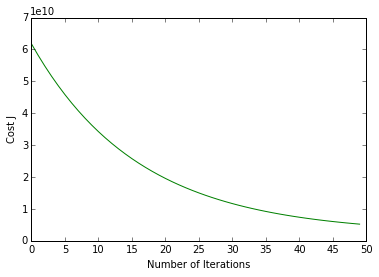

In [82]:
import matplotlib.pyplot as plt
from linearregression import MyLinearRegressor

regressor = MyLinearRegressor(alpha=0.03, \
                    iters=50, n_features=2, normalize=True)
    
regressor.fit(X,y)
J = regressor.J_hist

step = 5.0
plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.plot(np.arange(len(J)), J, '-g');
plt.xticks(np.arange(0, len(J)+step, step));

#### Learning Rate

Although the learning rate decreases steadily, we have not necessarily found the optimal learning rate. To determine the optimal learning rate we should find the learning rate the produces the lowest cost. And we can achieve this by initializing several learning rates and observe the cost associated with each over time. 

In [85]:
import os, sys
import numpy as np
from linearregression import MyLinearRegressor

#load training/test data
input_file = os.path.abspath(
        os.path.join(os.path.dirname(".."),
                     "ex1data2.txt"))

X, y = load_data(input_file)
X_test = np.array([[1, 1650, 3]])
  
best_alpha = 0
min_cost = float("inf")
best_theta = None
alpha_cost_hist = list()
   
alphas = [1.3, 1.0, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001] 
for i, alpha in enumerate(alphas):
    regressor = MyLinearRegressor(
        alpha=alpha, iters=50, n_features=2, normalize=True)
    regressor.fit(X,y)
    alpha_cost_hist.append(regressor.J_hist)
    cost = regressor.J_hist[-1]
        
    if cost <= min_cost:
        min_cost = cost
        best_alpha = alpha
        best_theta = regressor.theta
        
print("\nOptimal alpha=%s" % best_alpha)
print("Optimal theta=%s" % best_theta)

Number of training examples: 47
Number of features: 2

Optimal alpha=1.0
Optimal theta=[ 340412.65957447  109447.79646961   -6578.35485416]


The value $\alpha=1.0$ provides the optimal learning rate, as can be observed from the figure below

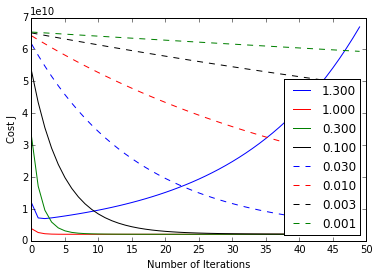

In [86]:
def plot_alpha_cost_hist(alphas, alpha_cost_hist):
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost J')
    
    step = 5.0
    color = ['b', 'r', 'g', 'k', 'b--', 'r--', '--k', '--g']
    
    for i, J in enumerate(alpha_cost_hist):
        plt.plot(np.arange(len(J)), J, color[i], label='{0:0.3f}'
                 ''.format(alphas[i]))
        plt.xticks(np.arange(0, len(J)+step, step))
    plt.legend(loc="lower right")
    plt.show()
    
plot_alpha_cost_hist(alphas, alpha_cost_hist)

### Part 3: Prediction

Given the optimal theta, we can now predict the price of houses. Note that we must first normalize each feature in our test  example before making the prediction.

In [89]:
X_test = np.array([[1, 
    np.true_divide(
        np.subtract(1650, np.mean(X[:,0])), np.std(X[:,0])), 
                
    np.true_divide(
        np.subtract(3, np.mean(X[:,1])), np.std(X[:,1]))
            ]])
    
price = np.dot(X_test, best_theta.T)
print("Predicted $%.0f" % price)

Predicted $293081


#### Normal Equations

Finding the optimal theta and predicting prices using the normal equations is straightforward. The optimal theta is the result of the following matrix multiplication

$$\Theta = (X^T X)^{-1} X^T y.$$

In python this implementation is easily achieved using numpy.

In [90]:
x_zero = np.ones(len(X))
X_ne = np.column_stack([x_zero, X])    
theta = np.dot(np.linalg.inv(np.dot(X_ne.T, X_ne)), np.dot(X_ne.T, y))

x_test = np.array([[1, 1650, 3]])
price = np.dot(x_test, theta.T) 

print("\nOptimal theta: %s" % theta)
print("Predicted Price: $%.0f" % price)


Optimal theta: [ 89597.9095428     139.21067402  -8738.01911233]
Predicted Price: $293081


### Part 4: Putting it all together

Minimized Cost: 4.48338825659
Optimal Theta: [-3.63029144  1.16636235]
Predicted: 4519.768
Predicted: 45342.450


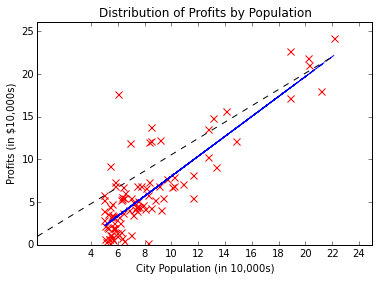

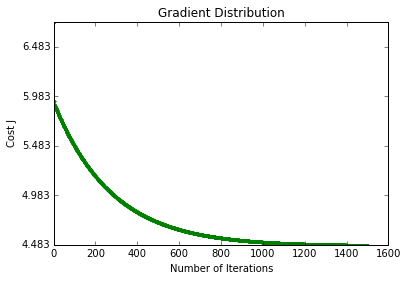


Optimal alpha=1.0
Optimal theta=[ 340412.65957447  109447.79646961   -6578.35485416]


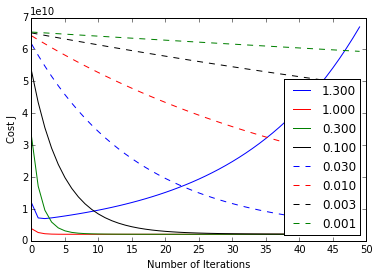

Predicted $293081

Optimal theta: [ 89597.9095428     139.21067402  -8738.01911233]
Predicted Price: $293081


In [93]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt


class MyLinearRegressor(object):
    """Linear Regression for n-variables
    
    Parameters
    ----------
    alpha : float 
        (optional) Learning rate. Default=0.01
        
    iters : int
        (optional) Max iterations for gradient descent. 
        Default=100
        
    theta : numpy array-like matrix
        Parameters to be learned
        
    n_features : int
        (optional) Number of features in training set
        Default=1
    
    normalize: boolean
        (optional) Whether features should be normalized     
        Default=False
    
    Attributes
    ----------
    n_examples : int
        Number of training examples 

    theta : numpy array-like matrix
        Parameters to be learned by the regressor

    J_hist : numpy array
        Cost function output at each iteration        
    """
    
    def __init__(self, alpha=0.01, iters=100, n_features=1, normalize=False):
        self.alpha = alpha
        self.n_iter = iters
        self.n_examples = 0
        self.n_features = n_features
        self.normalize = normalize
         
        self.theta = np.zeros(self.n_features+1)
        self.J_hist = np.zeros(self.n_iter) 
    
    def compute_cost(self, X, y):
        """Given a set of training examples, predictions, and parameters
        estimate the cost using the linear hypothesis function
        
        Parameters
        ----------
        X : numpy array-like matrix 
            Training examples
            
        y : numpy array
            Labels vector
            
        Returns
        -------
        J : float
            Cost of the predictions under given parameters
        """
        J = (1/(2*float(self.n_examples))) * \
                np.sum(np.square((np.subtract(self.decision_function(X), y))))
        return J
    
    def compute_gradient(self, X, y):
        """The function updates the paramaters using
        batch gradient descent. The default stopping
        condition is a fixed number of iterations. 
        
        Parameters
        ----------
        X : numpy array-like matrix 
            Training examples
            
        y : numpy array
            Labels vector
        """
        for i in np.arange(self.n_iter):
            #update the weights
            self.theta = self.theta - \
                (self.alpha/float(self.n_examples)) * \
                    np.dot(X.T, (np.subtract(self.decision_function(X), y)))
            
            #compute the updated cost
            J = self.compute_cost(X, y)
            
            self.J_hist[i] = J
            
    def get_params(self):
        """Retrieves the weights of the trained model"""
        return self.theta
    
    def decision_function(self, X):
        """The decision function used for prediction
        
        Parameters
        ----------
        X : numpy array-like matrix 
            Training examples
        
        Returns
        -------
        h : float
            Predicted values
        """
        return np.dot(X, self.theta.T)
    
    def normalize_features(self, X):
        """This function normalizes each feature in the
        dataset on a [0-1] scale. The normalization formula
        is as follows:

        >>> x_j = (x_j - muj) / sj

        where mu_j is the mean of a given feature
        and s_j is the standard deviation of the feature

        Parameters
        ----------
        X : numpy array-like matrix 
            Training examples

        Returns
        -------
        X_n : numpy array-like matrix
            Normalized training examples
        """
        n_ex = X.shape[0]
        n_fts = X.shape[1]
        X_n = np.zeros((n_ex, n_fts))
        for j in np.arange(n_fts):
            xj = X[:,j]
            muj = np.mean(xj)
            sj = np.std(xj) 
            a = np.true_divide(np.subtract(xj, muj), sj)
            X_n[:,j] = a
        return X_n
    
    def normal_equations(self, X):
        """Compute the optimal parameters using
        the normal equations. This approach is the 
        following matrix multiplication 
        >>> theta = np.inv(X.T * X) (X.T * y)

        Parameters
        ----------
        X : numpy array-like matrix
            Training examples

        Returns
        -------
        theta : numpy array
            Optimal parameters
        """
        x_zero = np.ones(len(X))
        X_ne = np.column_stack([x_zero, X])
        theta = np.dot(np.linalg.inv(np.dot(X_ne.T, X_ne)), 
                       np.dot(X_ne.T, y))
        return theta

    def fit(self, X, y):
        """Determines the optimal weights/parameters
        for the model by using batch gradient descent 
        
        Parameters
        ----------
        X : numpy array-like matrix 
            Training examples
            
        y : numpy array
            Labels vector
        """
        self.n_examples = len(X)
        
        if self.normalize:
            X = self.normalize_features(X) 

        x_zero = np.ones(len(X))
        X = np.column_stack([x_zero, X])
        
        self.compute_gradient(X, y)
    
    def predict(self, X_test):
        """Predicts continuous value for unseen test
        examples using the learned weights
        
        Parameters
        ----------
        X_text : numpy array-like matrix
            Test set examples
        
        """
        predictions = list()
        for x in X_test:
            y_pred = np.dot(x, self.theta.T)
            predictions.append(y_pred)
        return predictions
   
   
def load_data(input_file, delim=','):
    """Loads the data for our problem"""
    
    data = np.loadtxt(input_file, delimiter=delim)
    n_features = data.shape[1]-1
    if n_features == 1:
        X = data[:,0]
    else:
        X = data[:,np.arange(n_features)]
    y = data[:,n_features]
    assert len(X) == len(y)
    return X, y


def plot_decision(X, y, regressor):
    plt.title('Distribution of Profits by Population') 
    plt.xlabel('City Population (in 10,000s)')
    plt.ylabel('Profits (in $10,000s)')
    
    theta = regressor.get_params()
    step = 2.0
    x_zero = np.ones(len(X))
    X_n = np.column_stack([x_zero, X])
 
    x_ticks = (np.ceil(X))
    plt.xticks(np.arange(min(x_ticks)-step, max(x_ticks)+step, step))
    plt.xlim(0, max(x_ticks)+step)
    plt.ylim(0, max(y)+step)
    plt.scatter(X, y, s=50, marker='x', c='r')
    plt.plot(X, np.dot(X_n, theta.T), '--b')
    plt.plot([0,max(X)], [1,max(X)], '--k')
    plt.show()


def plot_gradient(X, regressor):
    plt.title('Gradient Distribution') 
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost J')
    
    J_hist = regressor.J_hist
    
    step = 0.5
    plt.yticks(np.arange(min(J_hist)-step, max(J_hist)+step, step))
    plt.plot(np.arange(len(J_hist)), J_hist, '.g', linewidth=0.2)
    plt.show()


def plot_alpha_cost_hist(alphas, alpha_cost_hist):
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost J')
    
    step = 5.0
    color = ['b', 'r', 'g', 'k', 'b--', 'r--', '--k', '--g']
    for i, J in enumerate(alpha_cost_hist):
        plt.plot(np.arange(len(J)), J, color[i], label='{0:0.3f}'
                 ''.format(alphas[i]));
        plt.xticks(np.arange(0, len(J)+step, step));    
    plt.legend(loc="lower right")
    plt.show() 


if __name__ == "__main__":
    
    #=============== For one variable =================== 
    input_file = os.path.abspath(
        os.path.join(os.path.dirname(".."), 
                     "ex1data1.txt"))
   
    #load training/test data
    X, y = load_data(input_file)
    X_test = np.array([[1, 3.5], [1, 7.0]])
   
    regressor = MyLinearRegressor(alpha=0.01, iters=1500, n_features=1)

    #learn the weights
    regressor.fit(X,y)
    print("Minimized Cost: %s" % regressor.J_hist[-1])
    print("Optimal Theta: %s" % regressor.theta)
    
    #apply learned weights to test data
    predictions = regressor.predict(X_test)
    for y_pred in predictions:
        print("Predicted: %.3f" % (y_pred * 10000))
    
    plot_decision(X, y, regressor)
    plot_gradient(X, regressor)
    
    #=============== For multiple variables =================== 
    #load training/test data
    input_file = os.path.abspath(
        os.path.join(os.path.dirname(".."),
                     "ex1data2.txt"))
    X, y = load_data(input_file)
    X_test = np.array([[1, 1650, 3]])
  
    best_alpha = 0
    min_cost = float("inf")
    best_theta = None
    alpha_cost_hist = list()
   
    alphas = [1.3, 1.0, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001] 
    for i, alpha in enumerate(alphas):
        regressor = MyLinearRegressor(alpha=alpha, 
                                      iters=50, n_features=2, normalize=True)
        
        regressor.fit(X,y)
        alpha_cost_hist.append(regressor.J_hist)
        cost = regressor.J_hist[-1]
        
        if cost <= min_cost:
            min_cost = cost
            best_alpha = alpha
            best_theta = regressor.theta
        
    print("\nOptimal alpha=%s\nOptimal theta=%s" % (best_alpha, best_theta))

    plot_alpha_cost_hist(alphas, alpha_cost_hist)

    #normalize each input feature in test example
    X_test = np.array([[1, 
                np.true_divide(
                    np.subtract(1650, np.mean(X[:,0])), 
                        np.std(X[:,0])), 
                
                np.true_divide(
                    np.subtract(3, np.mean(X[:,1])), 
                        np.std(X[:,1])) 
                ]])
    
    price = np.dot(X_test, best_theta.T)
    print("Predicted $%.0f" % price)

    #gradient minimization using the normal equations
    theta = regressor.normal_equations(X)
    x_test = np.array([[1, 1650, 3]])
    price = np.dot(x_test, theta.T) 

    print("\nOptimal theta: %s" % theta)
    print("Predicted Price: $%.0f" % price)

The fully implemented code is available <a href="linearregression.py">here</a>. In the next exercise we'll look at Logistic Regression. 